In [2]:
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.align as align
import warnings
from matplotlib import pyplot as plt
from pathlib import Path
import pandas as pd

/home/bruno/miniconda3/envs/siesta_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


_________________________________________________

FINAL ANALYSIS. RDF AS A FUNCTION OF TEMPERATURE:
_________________________________________________

In [3]:
# MDAnalysis documentation recommends suppressing some MDAnalysis warnings about PSF files
warnings.filterwarnings('ignore')
root = Path('')
results_dir_1 = root / 'Examples_NAMD-main' / 'MD_nanoparticle' / 'simulation1'
inputs_dir = root / 'Examples_NAMD-main' / 'MD_nanoparticle' / 'input'
DCDs_dir = root / 'Examples_NAMD-main' / 'MD_nanoparticle' / 'DCDs'

In [16]:
import csv
csv_file_path = root / 'data.csv'

distance = []
rdf_multiTemp = []
temp = []

for a in [300, 600, 900, 1200, 1500]:
    #Creating an atom group which in MDAnalysis is called a Universe.
    psf = mda.Universe(inputs_dir/'Au.psf', inputs_dir/'initial_positions.pdb', DCDs_dir/f'MD{str(a)}K.dcd')
    #In order to run the RDF method within MDAnalysis each frame of a trajectory, the selections must be dynamic (updating=True)
    center = psf.select_atoms('sphzone 1.8 ( all )', updating=True)
    all_atoms = psf.select_atoms('all', updating=True)
    rdf_values = []
    for i in np.arange(500,1001,50):
        psf.trajectory[i]
        center
        all_atoms
        irdf = rdf.InterRDF(center, all_atoms, 75, (1.8,15))
        irdf.run()
        rdf_values.append(irdf.rdf)
        for k in np.mean(rdf_values, axis=0):
            rdf_multiTemp.append(k)
        for b in irdf.bins:
            temp.append(a)
            distance.append(b)


In [17]:
data = list(zip(distance, temp, rdf_multiTemp))
print(temp)
with open(csv_file_path, 'w', newline='') as csvfile:
    headers = ['Distance', 'Temperature', 'RDF']
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(headers)
    csv_writer.writerows(data)

[300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300, 300,

Utilizing a 3D figure function I made for my TFG:

In [20]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def Figure3D(path, title, header1, header2, header3, num=1):
    data = pd.read_csv(path)
    x = data[header1].values
    y = data[header2].values
    z = data[header3].values
    aspect_ratio = 1.1
    fig_height = 8
    fig_width = fig_height * aspect_ratio
    if num == None:
        fig = plt.figure()
    else: 
        fig = plt.figure(num, figsize=(fig_width, fig_height))
        fig.set_facecolor('lightgrey')
    
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('#D3D3D3')
        
    # Plot the data points
    #ax.scatter(x, y, z, c='r', marker='o')
    ax.plot_trisurf(x, y, z, cmap='plasma', linewidth=0.2) #color maps: coolwarm, viridis, plasma, magma, jet

    # Set labels and title
    ax.set_xlabel(header1)
    ax.set_ylabel(header2)
    ax.set_zlabel(header3)
    ax.set_title(title, y=1.04)
    fig.tight_layout()
    plt.show()

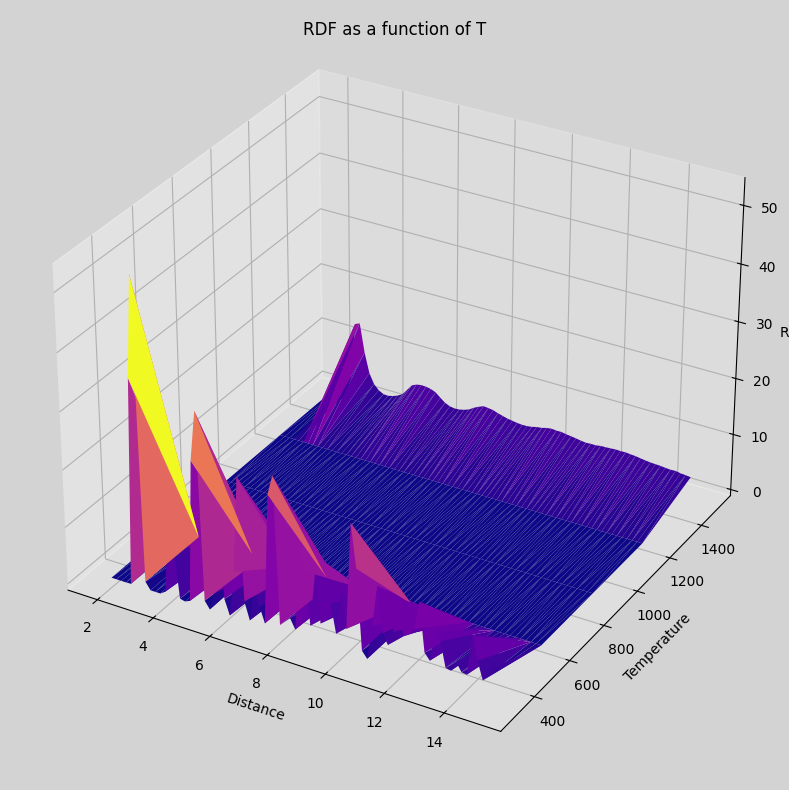

In [22]:
Figure3D('data.csv', 'RDF as a function of T','Distance', 'Temperature', 'RDF')